<a href="https://colab.research.google.com/github/dhirajsuvarna/nlp_text_classification/blob/master/learning/NLP_ULMFit_IMDB_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis - IMDB

Reference code - https://github.com/fastai/course-nlp/blob/master/review-nlp-transfer.ipynb

This notebook uses `version 1` for `fastai`

In [88]:
from fastai.text import *

In [89]:
# recent version of fastai is 2.* - which needs to be installed in the colab seperately 
import fastai
fastai.__version__

'1.0.61'

## Get the data of IMDB 

This is a sample version of the IMDB dataset

In [90]:
print(f"imdb sample path: {URLs.IMDB_SAMPLE}")
path = untar_data(URLs.IMDB_SAMPLE)
print(f"path:{path}")

imdb sample path: http://files.fast.ai/data/examples/imdb_sample
path:/root/.fastai/data/imdb_sample


In [91]:
df = pd.read_csv(path/'texts.csv')
print(df.head(5))
print(df.shape)


      label                                               text  is_valid
0  negative  Un-bleeping-believable! Meg Ryan doesn't even ...     False
1  positive  This is a extremely well-made film. The acting...     False
2  negative  Every once in a long while a movie will come a...     False
3  positive  Name just says it all. I watched this movie wi...     False
4  negative  This movie succeeds at being one of the most u...     False
(1000, 3)


In [92]:
# Train and Validation split in the dataset
print(df[df['is_valid'] == True].shape)
print(df[df['is_valid'] == False].shape)

(200, 3)
(800, 3)


In [93]:
# TextLMDataBunch isn't supported by fastai v2 

data_lm = TextLMDataBunch.from_csv(path, 'texts.csv')
print(type(data_lm))
# print(data_lm)



/usr/local/lib/python3.7/dist-packages/fastai/core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(a, dtype=dtype, **kwargs)


<class 'fastai.text.data.TextLMDataBunch'>


**`TextLMDataBunch.from_csv`**

Create a TextDataBunch from texts in csv files. kwargs are passed to the dataloader creation.

This method will look for csv_name, and optionally a test csv file, in path. These will be opened with header, using delimiter. You can specify which are the text_cols and label_cols; by default a single label column is assumed to come before a single text column. If your csv has no header, you must specify these as indices. If you're training a language model and don't have labels, you must specify the text_cols. If there are several text_cols, the texts will be concatenated together with an optional field token. If there are several label_cols, the labels will be assumed to be one-hot encoded and classes will default to label_cols (you can ignore that argument for a language model). label_delim can be used to specify the separator between multiple labels in a column.

You can pass a tokenizer to be used to parse the texts into tokens and/or a specific vocab for the numericalization step (if you are building a classifier from a language model you fine-tuned for instance). Otherwise you can specify parameters such as max_vocab, min_freq, chunksize for the Tokenizer and Numericalizer (processors). Other parameters (e.g. bs, val_bs and num_workers, etc.) will be passed to LabelLists.databunch() documentation) (see the LM data and classifier data sections for more info).


In [94]:
data_lm.save('data_lm_export.pkl')

In [95]:
bs=64

In [96]:
data_lm = load_data(path, 'data_lm_export.pkl', bs=bs)


In [126]:
torch.cuda.set_device(0)

In [130]:
learn_lm = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.5).to_fp16()


In [131]:
learn_lm.fit_one_cycle(1, slice(1e-2))


epoch,train_loss,valid_loss,accuracy,time
0,4.333601,3.910637,0.284747,00:32


In [132]:
learn_lm.unfreeze()
learn_lm.fit_one_cycle(5, slice(1e-4,1e-2))

epoch,train_loss,valid_loss,accuracy,time
0,3.963475,3.844701,0.290283,00:40
1,3.798450,3.861188,0.287232,00:40
2,3.467994,3.895121,0.285372,00:40
3,3.079474,3.954618,0.280476,00:40
4,2.805176,3.977736,0.280833,00:40


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py:1702: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more information.
  if p.grad is not None:
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py:1702: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more information.
  if p.gr

In [133]:
learn_lm.predict("this movie sucks big time", n_words=25)

'this movie sucks big time , there is as much though about education and re - education . As i say , Survivor seems to not have been'

In [134]:
learn_lm.predict("i ate a hot", n_words=5)

'i ate a hot chick , large blah enough'

In [135]:
learn_lm.save('ft')
learn_lm.save_encoder('ft_enc')

In [105]:
# location above files are saved
!ls /root/.fastai/data/imdb_sample/models

ft_enc.pth  ft.pth


In [106]:
#print(data_lm.train_ds.vocab)
print(data_lm.vocab.itos)

['xxunk', 'xxpad', 'xxbos', 'xxeos', 'xxfld', 'xxmaj', 'xxup', 'xxrep', 'xxwrep', 'the', ',', '.', 'and', 'a', 'of', 'to', 'is', 'it', 'in', 'i', 'that', 'this', '"', "'s", '-', '\n \n ', 'was', 'as', 'for', 'movie', 'with', 'but', 'film', ')', 'you', '(', 'on', "n't", 'are', 'not', 'his', 'he', 'have', 'be', 'one', 'they', 'at', 'all', 'by', 'an', 'from', 'like', 'so', 'who', '!', 'there', 'if', 'just', 'her', 'about', 'or', 'out', "'", 'do', 'some', 'has', 'what', 'good', 'more', 'when', '?', 'up', 'she', 'very', 'no', 'their', 'would', 'time', 'were', 'even', 'story', 'really', 'my', 'can', 'had', 'which', 'only', 'see', 'me', '...', ':', 'did', 'we', 'bad', 'into', 'than', 'does', 'well', 'will', 'also', 'first', 'get', 'other', 'people', 'its', 'because', 'could', 'how', 'much', 'been', 'most', 'any', 'make', 'great', 'two', 'made', 'them', '/', 'him', 'then', 'after', 'way', 'too', 'never', 'acting', 'think', ';', 'films', 'better', 'movies', 'character', 'little', 'watch', 'life

In [136]:
data_clas = TextClasDataBunch.from_csv(path, 'texts.csv', vocab=data_lm.train_ds.vocab, bs=32)
print(type(data_clas))
# print(data_clas)


/usr/local/lib/python3.7/dist-packages/fastai/core.py:302: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(a, dtype=dtype, **kwargs)


<class 'fastai.text.data.TextClasDataBunch'>


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [137]:
data_clas.save('data_clas_export.pkl')

In [138]:
data_clas = load_data(path, 'data_clas_export.pkl', bs=bs)


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [139]:
learn_c = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5).to_fp16()
learn_c.load_encoder('ft_enc')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (799 items)
x: TextList
xxbos xxmaj evil xxmaj breed is a very strange slasher flick that is unfortunately no good . xxmaj the beginning of the film seems promising but overall it 's a disaster . xxmaj the dialogue is pretty bad but not near as bad as the acting . xxmaj the acting is brutal and unbearable . xxmaj most of the characters deliver there lines horribly and even if that is on purpose the method does n't work because the characters become annoying . xxmaj some of the kills are innovative but it took far too long to get to them . xxmaj after about a half hour through the movie we get the first death ( other than in the xxunk then almost every other character is smoked within the next five minutes . xxmaj the movie then turned into sort of a spoof with ridiculous looking characters , unrealistic karate like fights , and a scene in which a man gets his intestines pulled out of his xxunk . xxmaj none of it is funny it 's just p

In [111]:
# data_clas.show_batch()

In [140]:
learn_c.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.632630,0.594487,0.716418,00:16


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [141]:
learn_c.unfreeze()
learn_c.fit_one_cycle(3, slice(1e-4, 1e-2))

epoch,train_loss,valid_loss,accuracy,time
0,0.474546,0.437509,0.865672,00:43
1,0.413244,0.329415,0.870647,00:45
2,0.339283,0.319156,0.860696,00:41


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py:1702: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access t

## Predictions

In [142]:
review = "This was a ok."
pred_cls, pred_idx, confidence_score = learn_c.predict(review)
print(f"{pred_cls.obj} | {pred_idx}: {confidence_score}")


positive | 1: tensor([0.2850, 0.7150])


In [143]:
review = "I didn't like the movie"
pred_cls, pred_idx, confidence_score = learn_c.predict(review)
print(f"{pred_cls.obj} | {pred_idx}: {confidence_score}")


negative | 0: tensor([0.8313, 0.1687])


In [144]:
review = "The moive did not reach my expectation"
pred_cls, pred_idx, confidence_score = learn_c.predict(review)
print(f"{pred_cls.obj} | {pred_idx}: {confidence_score}")


positive | 1: tensor([0.4976, 0.5024])


In [145]:
review = "audience were laughing and screaming throughout"
pred_cls, pred_idx, confidence_score = learn_c.predict(review)
print(f"{pred_cls.obj} | {pred_idx}: {confidence_score}")

positive | 1: tensor([0.3570, 0.6430])


In [146]:
review = "the movie was bad!"
pred_cls, pred_idx, confidence_score = learn_c.predict(review)
print(f"{pred_cls.obj} | {pred_idx}: {confidence_score}")

positive | 1: tensor([0.4867, 0.5133])


In [147]:
review = "This plot of the movie was confusing which left the audience bored"
pred_cls, pred_idx, confidence_score = learn_c.predict(review)
print(f"{pred_cls.obj} | {pred_idx}: {confidence_score}")


negative | 0: tensor([0.9008, 0.0992])


In [148]:
# after re-training run the above predictions again
learn_c.fit_one_cycle(3, slice(1e-4, 1e-2))

epoch,train_loss,valid_loss,accuracy,time
0,0.221002,0.406384,0.815920,00:41
1,0.216234,0.358415,0.855721,00:43
2,0.178552,0.321629,0.880597,00:45


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py:1702: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access t

In [149]:
review = "This was a ok."
pred_cls, pred_idx, confidence_score = learn_c.predict(review)
print(f"{pred_cls.obj} | {pred_idx}: {confidence_score}")


positive | 1: tensor([0.0816, 0.9184])


In [150]:
review = "I didn't like the movie"
pred_cls, pred_idx, confidence_score = learn_c.predict(review)
print(f"{pred_cls.obj} | {pred_idx}: {confidence_score}")


positive | 1: tensor([0.4836, 0.5164])


In [151]:
review = "The moive did not reach my expectation"
pred_cls, pred_idx, confidence_score = learn_c.predict(review)
print(f"{pred_cls.obj} | {pred_idx}: {confidence_score}")


positive | 1: tensor([0.3270, 0.6730])


In [152]:
review = "audience were laughing and screaming throughout"
pred_cls, pred_idx, confidence_score = learn_c.predict(review)
print(f"{pred_cls.obj} | {pred_idx}: {confidence_score}")

positive | 1: tensor([0.1803, 0.8197])


In [153]:
review = "the movie was bad!"
pred_cls, pred_idx, confidence_score = learn_c.predict(review)
print(f"{pred_cls.obj} | {pred_idx}: {confidence_score}")

positive | 1: tensor([0.0694, 0.9306])


In [154]:
review = "This plot of the movie was confusing which left the audience bored"
pred_cls, pred_idx, confidence_score = learn_c.predict(review)
print(f"{pred_cls.obj} | {pred_idx}: {confidence_score}")


negative | 0: tensor([0.9979, 0.0021])


## Analysis of the Results

In [115]:
print(learn_c.data.classes) # to check the classes order considered 

['negative', 'positive']


In [116]:
from sklearn import metrics
preds = learn.get_preds()

In [117]:
predictions = np.argmax(preds[0], axis = 1) 
targets = preds[1]
print (f"predict:{predictions}")
print(f"target:{targets}")
confusion_matrix = metrics.confusion_matrix(targets, predictions)
print(confusion_matrix)
target_names = learn_c.data.classes
print(metrics.classification_report(targets, predictions, target_names=target_names))

predict:tensor([1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
        1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
        0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
        1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
        0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
        0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
        0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
        1, 0, 1, 1, 0, 0, 0, 1, 0])
target:tensor([0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
        1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
        0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
        1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0

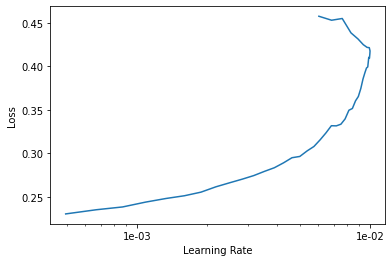

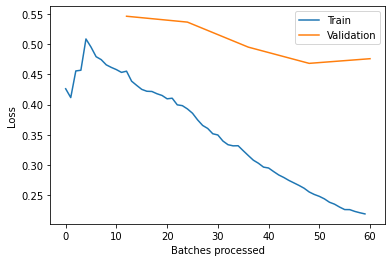

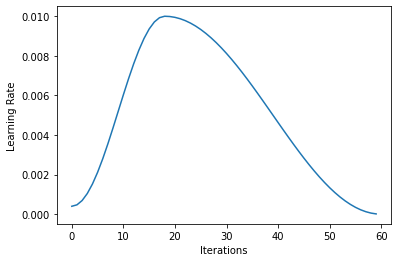

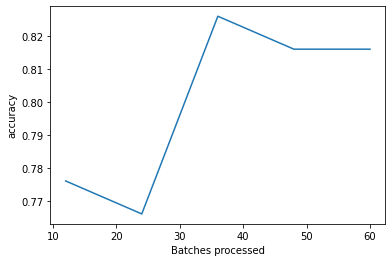

In [114]:
#Plot the error curves
learn_c.recorder.plot()
learn_c.recorder.plot_losses()
learn_c.recorder.plot_lr()
learn_c.recorder.plot_metrics()